#### 이 문서는 초보가 제작하였으므로, 틀린 부분이 있을 수 있습니다.

## Jupyter 환경 설정

In [1]:
!echo $HOME

/home/bage


In [2]:
# Ubuntu16.04 + Anaconda3(4.3) + Python3.5 + Tensorflow1.1 + Jupyter Notebook
!lsb_release -a | grep "Description"
!conda info | grep "environment\|conda version\|python"
!pip freeze | grep "tensorflow\|jupyterthemes"

No LSB modules are available.
Description:	Ubuntu 16.04.2 LTS
          conda version : 4.3.16
         python version : 3.5.3.final.0
       root environment : /home/bage/anaconda3  (writable)
    default environment : /home/bage/anaconda3
jupyterthemes==0.15.6
tensorflow-gpu==1.1.0


In [3]:
# Jupyter 기본 환경
!grep "^[^#;]" /home/bage/.jupyter/jupyter_notebook_config.py # Ubuntu
#!grep "^[^#;]" /Users/bage/.jupyter/jupyter_notebook_config.py # OSX

c.JupyterApp.config_file = '/home/bage/.jupyter/jupyter_notebook_config.py'
c.JupyterApp.config_file_name = '/home/bage/.ipython/bage_notebook_config.py'
c.NotebookApp.port = 8888
c.NotebookApp.notebook_dir = '/home/bage/Dropbox/ipynb'
c.NotebookApp.open_browser = False
c.NotebookApp.ip = '192.168.1.101'
c.NotebookApp.file_to_run = '/home/bage/.ipython/bage_notebook_config.py'


In [4]:
# Jupyter - 자주 쓰는 명령은 자동실행되도록 설정해 두었습니다.
!grep "^[^#;]" /home/bage/.ipython/profile_default/ipython_config.py 

c.InteractiveShellApp.exec_PYTHONSTARTUP = True
c.InteractiveShellApp.exec_files = [ "/home/bage/.ipython/bage_notebook_config.py", ]
c.InteractiveShellApp.exec_lines = [ "%matplotlib inline", ]


In [5]:
# 자주 쓰는 명령은 자동실행
!cat /home/bage/.ipython/bage_notebook_config.py 

import warnings
warnings.filterwarnings("ignore")

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.finance as finance
import matplotlib.ticker as ticker
from matplotlib import gridspec
matplotlib.style.use('ggplot')

import seaborn as sns
sns.set_style("dark", {'axes.grid' : False})
sns.set(font='D2Coding') # 가장 마지막에 해야 함.

from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure

import tensorflow as tf
import numpy as np
import pandas as pd
import math
import datetime
import pprint


In [6]:
!grep "^[^ #;]" /home/bage/.config/matplotlib/matplotlibrc # Ubuntu
# !grep "^[^ #;]" /Users/bage/.matplotlib/matplotlibrc # OSX

backend      : Agg
backend_fallback: True
interactive  : True
toolbar      : toolbar2   # None | classic | toolbar2
timezone     : UTC        # a pytz timezone string, eg US/Central or Europe/Paris
lines.linewidth   : 1.0     # line width in points
lines.antialiased : True         # render lines in antialised (no jaggies)
patch.linewidth        : 0.5     # edge width in points
patch.facecolor        : 348ABD # blue
patch.edgecolor        : eeeeee
patch.antialiased      : True    # render patches in antialised (no jaggies)
font.family          : D2Coding
font.size           : 12.0
font.monospace      : Andale Mono, Nimbus Mono L, Courier New, Courier, Fixed, Terminal, monospace
axes.facecolor      : eeeeee   # axes background color
axes.edgecolor      : bcbcbc   # axes edge color
axes.linewidth      : 1        # edge linewidth
axes.grid           : True     # display grid or not
axes.titlesize      : x-large  # fontsize of the axes title
axes.labelsize      : large    # fontsize of the 

### 여러 개의 jupyter notebook 창을 

# CNN for MNIST
### 원본
- https://www.tensorflow.org/get_started/mnist/pros

### 한글
- https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/mnist/pros/

### 소스: 
- https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-11-1-mnist_cnn.py

## MNIST 데이터

In [7]:
# from matplotlib import gridspec
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
# mnist gz 파일 읽기 (binary 라서 안 보임.)
!zcat MNIST_data/train-images-idx3-ubyte.gz | head

    �`                                                                                                                                                              ~�����            $^�����������@           1����������]RR8'            ������ƶ��                  P�k��� +�                   ��Z                         ���                        ��F                         #��l                       Q���w                       -����                       ]���                         ���@                     .�����                   '�������                  r������N                 B������Q                �������P	                7�������                  ����ԇ�                                                                                                                                                                                                                                   3���2                      0�����                     6������9               

In [9]:
# mnist Datasets 객체의 타입 확인
print(type(mnist))

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>


In [10]:
import tensorflow
# ?tensorflow # 이건 잘 되는데..
# ?tensorflow.contrib.learn.python.learn.datasets.base.Datasets # 이건 안되네.. ㅠ.ㅠ

#### (질문) 위처럼 도움말 안 보일 때 어떻게 해야 하나요?

In [11]:
# mnist Datasets(mnist) 객체의 메소드 훑어 보기
[('mnist.%s' % k, type(eval('mnist.%s' % k))) for k in dir(mnist) if not k.startswith('_')]

[('mnist.count', builtin_function_or_method),
 ('mnist.index', builtin_function_or_method),
 ('mnist.test', tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet),
 ('mnist.train', tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet),
 ('mnist.validation',
  tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet)]

In [12]:
# mnist Dataset(mnist.test) 객체의 메소드 훑어 보기
[('mnist.test.%s' % k, type(eval('mnist.test.%s' % k))) for k in dir(mnist.test) if not k.startswith('_')]

[('mnist.test.epochs_completed', int),
 ('mnist.test.images', numpy.ndarray),
 ('mnist.test.labels', numpy.ndarray),
 ('mnist.test.next_batch', method),
 ('mnist.test.num_examples', int)]

In [13]:
type(mnist.test.images), type(mnist.test.labels)

(numpy.ndarray, numpy.ndarray)

## 이미지 출력

In [14]:
import numpy
def show_image(image:numpy.ndarray, title:str='title', 
               smoothing=False, relative_color=True, cmap:str='gray'):
    """
    한장의 이미지 출력
    :param image: 2D or 3D array (height, width) or (height, width, channel)
    :param title: label
    :param smoothing: antialiasing 효과 (matplotlibrc 에서 기본값 설정 가능.)
    :param relative_color: 픽셀값이 유사한 경우, 명암의 차이를 크게 한다.
    :param cmap: color map ('Greys' or 'gray')
    """
    print(image.shape)
    if title:
        plt.title('label: {title}'.format(title=title))
        
    if smoothing: # antialiasing
        interpolation = None
    else:
        interpolation = "nearest"
        
    if relative_color:
        vmin, vmax = None, None
    else:
        vmin, vmax = 0, 1
        
    plt.imshow(image, cmap=cmap, interpolation=interpolation, vmin=vmin, vmax=vmax)
    plt.grid(False)
    plt.show()
# ?show_image

plt.imshow(interploation=...)
http://matplotlib.org/1.4.3/examples/images_contours_and_fields/interpolation_methods.html
<img src="img/plt_imshow_interpolation.png">

In [15]:
pixels = np.array([[0.5+ i*0.001]*11 for i in range(0, 11)])
label = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # one hot vector
print(label, '->', np.argmax(label))
pprint.pprint(pixels)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] -> 2
array([[ 0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,  0.5  ,
         0.5  ,  0.5  ,  0.5  ],
       [ 0.501,  0.501,  0.501,  0.501,  0.501,  0.501,  0.501,  0.501,
         0.501,  0.501,  0.501],
       [ 0.502,  0.502,  0.502,  0.502,  0.502,  0.502,  0.502,  0.502,
         0.502,  0.502,  0.502],
       [ 0.503,  0.503,  0.503,  0.503,  0.503,  0.503,  0.503,  0.503,
         0.503,  0.503,  0.503],
       [ 0.504,  0.504,  0.504,  0.504,  0.504,  0.504,  0.504,  0.504,
         0.504,  0.504,  0.504],
       [ 0.505,  0.505,  0.505,  0.505,  0.505,  0.505,  0.505,  0.505,
         0.505,  0.505,  0.505],
       [ 0.506,  0.506,  0.506,  0.506,  0.506,  0.506,  0.506,  0.506,
         0.506,  0.506,  0.506],
       [ 0.507,  0.507,  0.507,  0.507,  0.507,  0.507,  0.507,  0.507,
         0.507,  0.507,  0.507],
       [ 0.508,  0.508,  0.508,  0.508,  0.508,  0.508,  0.508,  0.508,
         0.508,  0.508,  0.508],
       [ 0.509,  0.

(11, 11)


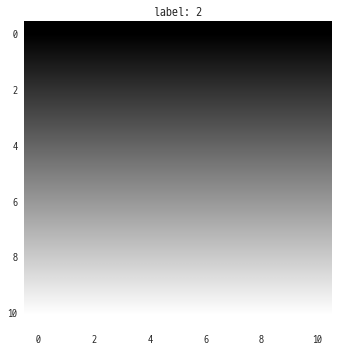

In [16]:
show_image(pixels, np.argmax(label), smoothing=True, relative_color=True) # default imshow()

(11, 11)


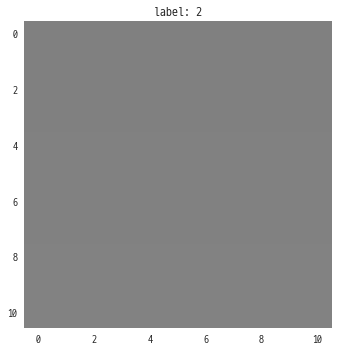

In [17]:
show_image(pixels, np.argmax(label), smoothing=False, relative_color=False) # for image

(11, 11)


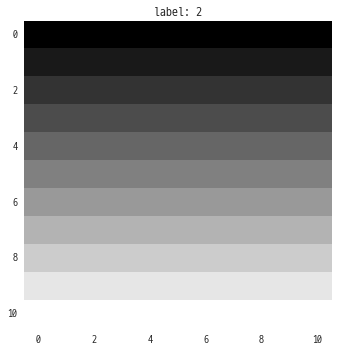

In [18]:
show_image(pixels, np.argmax(label), smoothing=False, relative_color=True) # for kernel

(113, 122, 4)


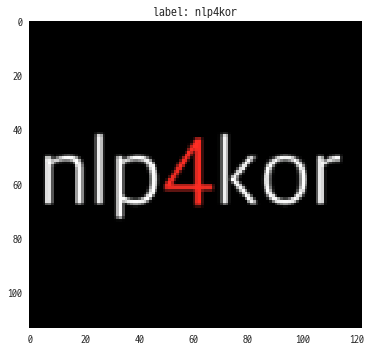

(113, 122, 4)


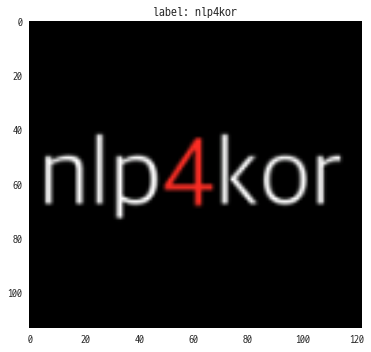

(113, 122, 4)


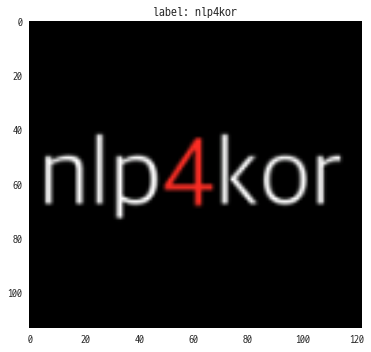

In [19]:
import matplotlib.image as mpimg
nlp4kor_logo = mpimg.imread('img/nlp4kor.png')
show_image(nlp4kor_logo, title='nlp4kor', smoothing=False)
show_image(nlp4kor_logo, title='nlp4kor', smoothing=True, relative_color=True)
show_image(nlp4kor_logo, title='nlp4kor', smoothing=True, relative_color=False)

In [20]:
# check input data
n_sample, height, width, channels = 2, 28, 28, 1 # NHWC
sample_images = mnist.test.images[:n_sample]
sample_labels = mnist.test.labels[:n_sample]
print(sample_images.shape, 'mnist.test.images', sample_images[0][350:400])
print(sample_labels.shape, 'mnist.test.labels', sample_labels[0])

(2, 784) mnist.test.images [ 0.          0.          0.          0.08627451  0.91372555  1.
  0.32549021  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.50588238  0.99607849
  0.9333334   0.17254902  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
(2, 10) mnist.test.labels [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


(2, 784) mnist.test.images
(2, 28, 28, 1) NHWC
(28, 28)


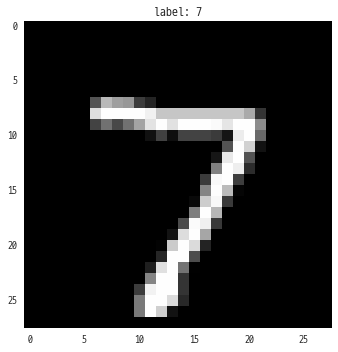

(28, 28)


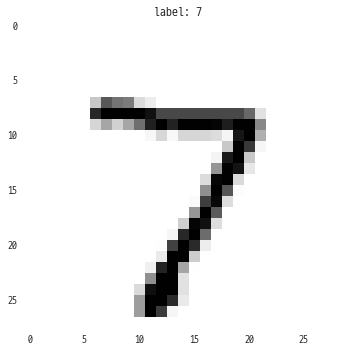

(28, 28)


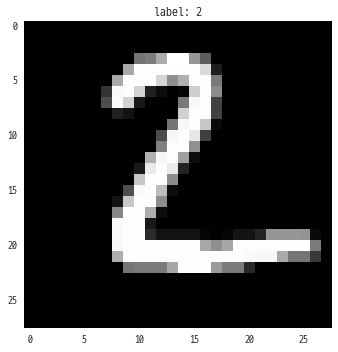

(28, 28)


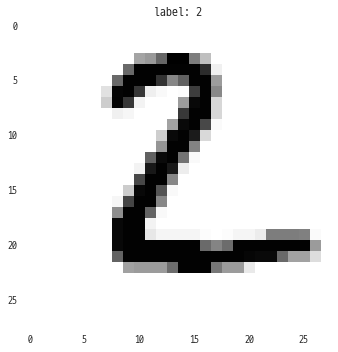

In [21]:
print(sample_images.shape, 'mnist.test.images')
sample_images = sample_images.reshape((n_sample, height, width, channels)) # NHWC
print(sample_images.shape, 'NHWC')

for i, image in enumerate(sample_images):
    image = image.reshape((height, width))
    show_image(image, np.argmax(sample_labels[i]), cmap='gray')
    show_image(image, np.argmax(sample_labels[i]), cmap='Greys')

In [22]:
def show_images(images, title='title', is_kernel=False, is_pooled_image=False,
                smoothing=False, relative_color=True, cmap='Greys',
                subtitles=[], n_cols=5, max_samples=20):
    """
    이미지(2D array) 또는 커널(feature map)을 이미지로 출력
    :param images: 4D array (NHWC or HWNC)
    :param title: 메인 타이틀
    :param is_kernel: True=커널(HWCC)인 경우 이미지형태로(NHWC) reshape.
    :param is_pooled_image: True=Pooling Layer에서 출력된 이미지
    :param smoothing: antialiasing 효과 (matplotlibrc 에서 기본값 설정 가능.)
    :param relative_color: 픽셀값이 유사한 경우, 명암의 차이를 크게 한다.
    :param cmap: color map ('Greys' or 'gray')
    :param subtitles: 각 이미지의 타이틀 (라벨 표시용)
    :param n_cols: 여러 개의 이미지를 표시할 때, 가로에 표시될 이미지 개수
    :param max_samples: images에서 몇 개의 데이타를 뽑아서 표시할 지 (max of N)
    """
    if smoothing: # antialiasing
        interpolation = None
    else:
        interpolation = "nearest"
        
    if relative_color:
        vmin, vmax = None, None
    else:
        vmin, vmax = 0, 1
        
    if is_kernel: # need to reshape (HW NC -> N HW C)
        print('images(is_kernel):', images.shape)
        height, width, input_channels, output_channels = images.shape # HWNC
        images = images.reshape(height, width, -1) # height, width, input_channels * output_channels
        images = np.rollaxis(images, 2) # input_channels * output_channels, height, width
    elif is_pooled_image: # NHWc -> C HW (14, 14, 32) -> (32, 14, 14)
        print('images(is_pooled_image):', images.shape)
        images = np.rollaxis(images, 2, 0) 
        
    print('images:', images.shape)
    if len(images) > max_samples:
        title = '%s (%s of %s)' % (title, max_samples, len(images))
        images = images[:max_samples]
    
    if len(images) == 0:
        return
    elif len(images) == 1:
        show_image(images[0], title=title, smoothing=smoothing, 
                   relative_color=relative_color, cmap=cmap)
    elif len(images) > 1:
        n_rows = len(images) // n_cols
        if len(images) % n_cols != 0:
            n_rows += 1
        
        fig = plt.figure(figsize=(10, 10)) # 전체 사이즈 (인치)
        gs = gridspec.GridSpec(n_rows, n_cols) # 여러 이미지 표시할 그리드
#         gs.update(wspace=0.01, hspace=0.3) # 간격 옵션
        fig.suptitle(title, fontsize=20) # 메인 타이틀
    
        nth = -1
        for row in range(n_rows):
            for col in range(n_cols):
                nth += 1
                if nth >= max_samples:
                    return
                image = images[nth] # WHC
                ax = plt.subplot(gs[nth]) # 각 이미지 공간
                ax.grid(False) # 그리드 출력
                ax.axis('off') # 가로/세로축 출력
                if len(subtitles) == len(images):
                    ax.set_title(subtitles[nth])
                else:
                    ax.set_title(nth)
                    
                ax.imshow(image, cmap=cmap, interpolation=interpolation, vmin=vmin, vmax=vmax)

In [23]:
def virtual_kernels(height, width, input_channels, output_channels):
    """
    가상의 커널(feature map)을 생성 (HWNC)
    """
    colors = np.linspace(0, 1, output_channels)
    print('colors:', len(colors), colors)
    
    images = np.ndarray((output_channels, height, width, input_channels)) # CHWN
    for nth, image in enumerate(images):
        image.fill(colors[nth]) # same color in same channel.
    #     print(color_index)
    return np.moveaxis(images, 0, 3) # HWC

kernels = virtual_kernels(5, 5, 1, 32)
print(kernels.shape)

colors: 32 [ 0.          0.03225806  0.06451613  0.09677419  0.12903226  0.16129032
  0.19354839  0.22580645  0.25806452  0.29032258  0.32258065  0.35483871
  0.38709677  0.41935484  0.4516129   0.48387097  0.51612903  0.5483871
  0.58064516  0.61290323  0.64516129  0.67741935  0.70967742  0.74193548
  0.77419355  0.80645161  0.83870968  0.87096774  0.90322581  0.93548387
  0.96774194  1.        ]
(5, 5, 1, 32)


images(is_kernel): (5, 5, 1, 32)
images: (32, 5, 5)


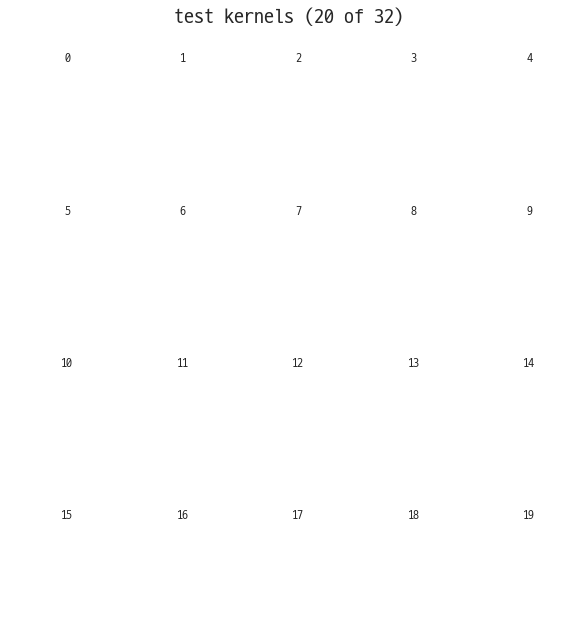

In [24]:
show_images(kernels, title='test kernels', is_kernel=True, subtitles=[], relative_color=True) 
# default view on your PC

images(is_kernel): (5, 5, 1, 32)
images: (32, 5, 5)


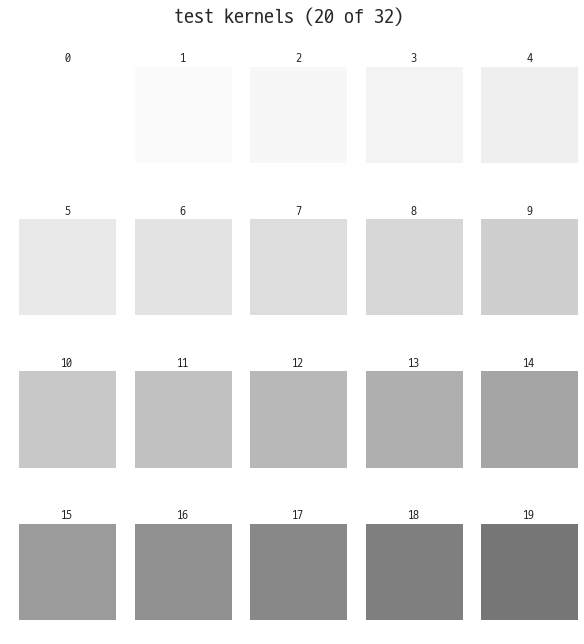

In [25]:
show_images(kernels, title='test kernels', is_kernel=True, subtitles=[], relative_color=False) 

### Kernel(Weight, Bias), Convolution/Pooling Layer 생성 함수

CNN for MNIST
https://bigballon.github.io/posts/Learn_DL_hard_way_02.html
<img src="img/cnn_mnist_structure.png">

In [26]:
# Wx + b
def weight_variable(shape): # W
    """
    Weight 생성 함수 (kernel)
    :prarm shape: height, width, input channels, output channels (=HWNC)
    """
    # truncated_normal 대칭성을 깨뜨리고 기울기(gradient)가 0이 되는 것을 방지하기 위해 ?
    initial = tf.truncated_normal(shape=shape, mean=0.0, stddev=0.1) 
    return tf.Variable(initial)

def bias_variable(shape): # b
    """
    Bias 생성 함수 (kernel)
    :prarm shape: height, width, input channels, output channels (=HWNC)
    """
    initial = tf.constant(0.1  , shape=shape)
    return tf.Variable(initial)

In [27]:
_w = weight_variable([5, 5, 1, 32]) # HWNC
print(_w)

<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>


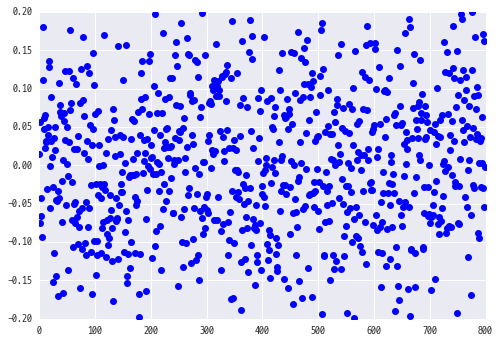

In [28]:
# tf.session
_w = weight_variable([5, 5, 1, 32]) # HWNC
with tf.Session() as sess: # 세션 초기화, 종료 자동화 (with = __enter__, __exit__)
    sess.run(tf.global_variables_initializer())
    w = sess.run(_w) # ndarray
#     w = _w.eval() # InteractiveSession() 에서만 되는거 아닌가?
w = w.flatten() # for plotting
plt.plot(w, 'bo') # FIXME: 누적 그래프

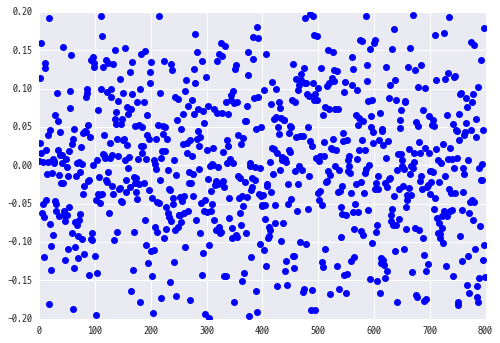

In [29]:
# tf.interative session
sess = tf.InteractiveSession() 
_w = weight_variable([5, 5, 1, 32])
_w.initializer.run()
w = _w.eval() # ndarray
sess.close() # 사용후, close()를 반드시 호출해 줄 것.
w = w.flatten()
plt.plot(w, 'bo')

In [30]:
def run_node(tf_node):
    """
    session 실행해서 노드의 값을 얻는 함수
    :param tf_node: tensorflow.Variable
    """
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        return sess.run(tf_node)

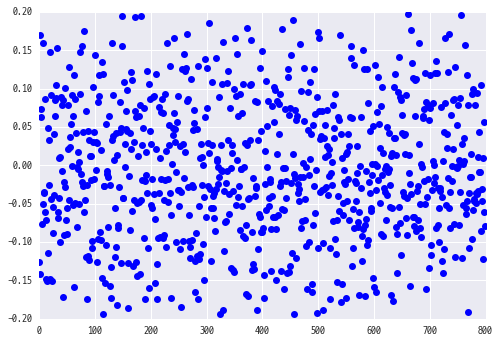

In [31]:
w = run_node(weight_variable([5, 5, 1, 32])).flatten()
plt.plot(w, 'bo')

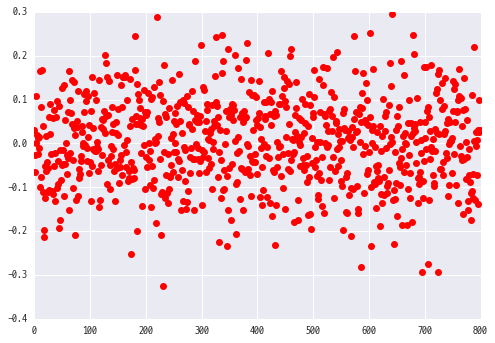

In [32]:
def weight_variable2(shape): # random_normal
    initial = tf.random_normal(shape=shape, mean=0.0, stddev=0.1) 
    return tf.Variable(initial)
w2 = run_node(weight_variable2([5, 5, 1, 32])).flatten()
plt.plot(w2, 'ro')

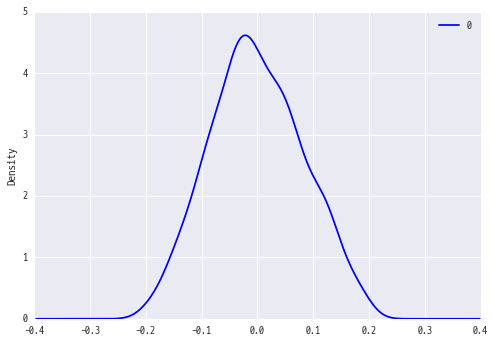

In [33]:
w = run_node(weight_variable([5, 5, 1, 32])).flatten()
# _ = plt.hist(w, bins=100, color='blue') # histogram
df = pd.DataFrame(w)
df.plot(kind='density', color='blue') # density plot

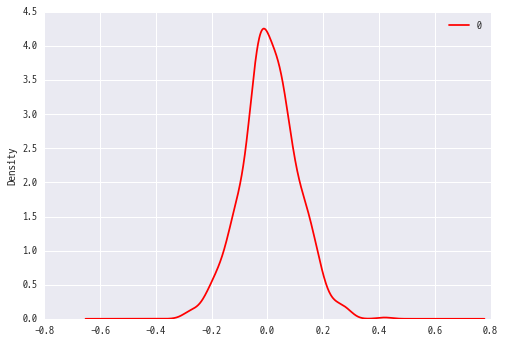

In [34]:
w2 = run_node(weight_variable2([5, 5, 1, 32])).flatten()
# _ = plt.hist(w2, bins=100, color='red') # histogram
df2 = pd.DataFrame(w2)
df2.plot(kind='density', color='red') # density plot

In [35]:
def conv2d(x, W, strides = [1, 1, 1, 1]):
    """
    Convolution Layer 
    :param x: input data
    :param W: Weight(kernel)
    :param strides: batch, height, width, channel (NHWC)
    """
    return tf.nn.conv2d(x, W, strides=strides, padding='SAME')

def max_pool_2x2(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1]):
    """
    Pooling Layer (기본 2x2로 pooling)
    :param x: input data
    :param ksize: batch, height, width, channel (NHWC)
    :param strides: batch, height, width, channel (NHWC)
    """
    return tf.nn.max_pool(x, ksize=ksize, strides=strides, padding='SAME')

## 신경망(그래프) 구성

In [36]:
_, height, width, n_channel0 = x_image_shape = [-1, 28, 28, 1]
# N = mnist.test.labels.shape[0]
n_classes = mnist.test.labels.shape[1] # 0 ~ 9

# input data (X)
x = tf.placeholder(tf.float32, [None, height * width]) # batch, height*width*channel
x_image = tf.reshape(x, x_image_shape) # batch, height, width, channel (NHWC)
print('mnist.test.images:', mnist.test.images.shape)
print('x:', x)
print('x_image:', x_image)
# print('?(N):', N)
# print('mnist.test.images.image: %s, %s * %s, %s (N, H*W, C)' % (N, width, height, channels))

# input data (Y)
print('n_classes:', n_classes)
y_ = tf.placeholder(tf.float32, [None, n_classes]) # labels, from data
print('y_:', y_)

mnist.test.images: (10000, 784)
x: Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
x_image: Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)
n_classes: 10
y_: Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [37]:
# conv layer 1
n_channel1 = 32
W_conv1 = weight_variable([5, 5, 1, n_channel1]) # height, width, input channels, output channels
b_conv1 = bias_variable([n_channel1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # relu ( conv(x, W) + b )
h_pool1 = max_pool_2x2(h_conv1) # 28 * 28 -> 14 * 14
print('W_conv1:', W_conv1)
print('b_conv1:', b_conv1)
print('h_conv1:', h_conv1)
print('h_pool1:', h_pool1)

W_conv1: <tf.Variable 'Variable_7:0' shape=(5, 5, 1, 32) dtype=float32_ref>
b_conv1: <tf.Variable 'Variable_8:0' shape=(32,) dtype=float32_ref>
h_conv1: Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
h_pool1: Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


In [38]:
# conv layer 2 
n_channel2 = 64
W_conv2 = weight_variable([5, 5, n_channel1, n_channel2])
b_conv2 = bias_variable([n_channel2])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # relu ( conv(x, W) + b )
h_pool2 = max_pool_2x2(h_conv2) # 14 * 14 -> 7 * 7
print('W_conv2:', W_conv2)
print('b_conv2:', b_conv2)
print('h_conv2:', h_conv2)
print('h_pool2:', h_pool2)

W_conv2: <tf.Variable 'Variable_9:0' shape=(5, 5, 32, 64) dtype=float32_ref>
b_conv2: <tf.Variable 'Variable_10:0' shape=(64,) dtype=float32_ref>
h_conv2: Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
h_pool2: Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


In [39]:
# fully connected layer 1 = 3136 -> 1024
_, height_pool2, width_pool2, _ = h_pool2.shape
print('N2, height_pool2, width_pool2, n_channel2:', _, height_pool2, width_pool2, n_channel2)

n_features = int(height_pool2) * int(width_pool2) * n_channel2 # input of FFNN
n_hidden = 1024 # neuron of FFNN
h_pool2_flat = tf.reshape(h_pool2, [-1, n_features]) # input of FFNN
W_fc1 = weight_variable([n_features, n_hidden]) # Weight of FFNN
b_fc1 = bias_variable([n_hidden]) # bias of FFNN
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1) # output of FFNN

# drop out
keep_prob = tf.placeholder(tf.float32) # keep rate for dropout
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob) # dropouted output of FFNN

print('h_pool2_flat:', h_pool2_flat)
print('W_fc1:', W_fc1)
print('b_fc1:', b_fc1)
print('h_fc1:', h_fc1)
print('h_fc1_drop:', h_fc1_drop)

N2, height_pool2, width_pool2, n_channel2: 64 7 7 64
h_pool2_flat: Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
W_fc1: <tf.Variable 'Variable_11:0' shape=(3136, 1024) dtype=float32_ref>
b_fc1: <tf.Variable 'Variable_12:0' shape=(1024,) dtype=float32_ref>
h_fc1: Tensor("Relu_2:0", shape=(?, 1024), dtype=float32)
h_fc1_drop: Tensor("dropout/mul:0", shape=(?, 1024), dtype=float32)


#### (질문) Fully Connected Layer가 왜 2개 일까요? 1개는 안되나요?

In [40]:
# fully connected layer 2 = 1024 -> 10
n_classes = mnist.test.labels.shape[1] # number of lables 0 ~ 9
W_fc2 = weight_variable([n_hidden, n_classes]) # W
b_fc2 = bias_variable([n_classes]) # b
logits = tf.matmul(h_fc1_drop, W_fc2) + b_fc2 # Wx + b
y = tf.nn.softmax(logits)

## 그래프 구동(학습)

In [41]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=1)) # loss (cost)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy) # training

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) # evaluation
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # evaluation

iteration = 10000 # max iteration
check_accuracy_interval = min(1000, (iteration / 10)) # less than 1000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    print('training...')
    for i in range(1, iteration+1): # 1 ~ 10000
        batch = mnist.train.next_batch(50) # mini batch (size=50)
        batch_x, batch_y = batch[0], batch[1] # images, labels
        train_step.run(feed_dict={x: batch[0], y_: batch_y, keep_prob: 0.5}) # with dropout
        if i % check_accuracy_interval == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch_x, y_: batch[1], keep_prob: 1.0})
            print("[step %d] training accuracy %.8f" % (i, train_accuracy))
    print('training OK.')

    print('evaluate...')
    _accuracy, _W_conv1, _W_conv2, _h_pool1, _h_pool2 = sess.run(
        [accuracy, W_conv1, W_conv2, h_pool1, h_pool2], 
        feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}) # without dropout
    print("evaluate OK. accuracy %.8f" % _accuracy)

    print('save models to numpy array...')
    np.save('MNIST_model/W_conv1', _W_conv1)
    np.save('MNIST_model/W_conv2', _W_conv2)
    np.save('MNIST_model/h_pool1', _h_pool1)
    np.save('MNIST_model/h_pool2', _h_pool2)
    np.save('MNIST_model/labels', mnist.test.labels)
    print('save models to numpy array OK.')

training...
[step 1000] training accuracy 1.00000000
[step 2000] training accuracy 0.98000002
[step 3000] training accuracy 1.00000000
[step 4000] training accuracy 1.00000000
[step 5000] training accuracy 0.98000002
[step 6000] training accuracy 1.00000000
[step 7000] training accuracy 0.98000002
[step 8000] training accuracy 1.00000000
[step 9000] training accuracy 1.00000000
[step 10000] training accuracy 1.00000000
training OK.
evaluate...
evaluate OK. accuracy 0.99070007
save models to numpy array...
save models to numpy array OK.


#### (질문) Tensorflow Optimizer 중에 AdamOptimizer가 최고인가요?
https://emcslabs.github.io/machinelearning/AdamOptimizer
<img src="img/optimizers.png" width="80%">

In [42]:
!ls -lh MNIST_model/

합계 360M
-rw-rw-r-- 1 bage bage 3.3K May 20 21:46 W_conv1.npy
-rw-rw-r-- 1 bage bage 201K May 20 21:46 W_conv2.npy
-rw-rw-r-- 1 bage bage 240M May 20 21:46 h_pool1.npy
-rw-rw-r-- 1 bage bage 120M May 20 21:46 h_pool2.npy
-rw-rw-r-- 1 bage bage 782K May 20 21:46 labels.npy


## 모델(Weight) 로딩하여, 이미지로 출력

In [43]:
print('load models...')
labels = np.load('MNIST_model/labels.npy') # labels
print('load models OK.')
pprint.pprint(labels[:3])

load models...
load models OK.
array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])


load models...
load models OK.
_W_conv1: (5, 5, 1, 32)
images(is_kernel): (5, 5, 1, 32)
images: (32, 5, 5)


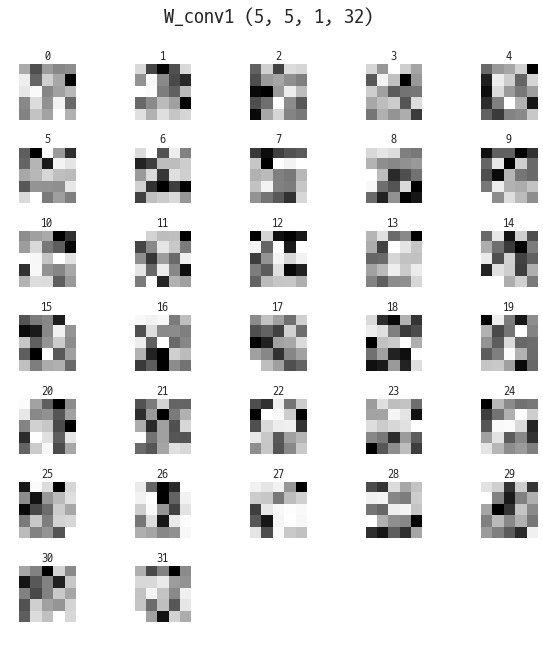

In [44]:
print('load models...')
_W_conv1 = np.load('MNIST_model/W_conv1.npy') # kernels of convolution layer #1 (5x5)
print('load models OK.')

print('_W_conv1:', _W_conv1.shape)
show_images(_W_conv1, is_kernel=True, title='W_conv1 %s' % str(_W_conv1.shape), relative_color=True, max_samples=32)

load models...
load models OK.
_h_pool1: (10000, 14, 14, 32)
images(is_pooled_image): (14, 14, 32)
images: (32, 14, 14)
images(is_pooled_image): (14, 14, 32)
images: (32, 14, 14)
images(is_pooled_image): (14, 14, 32)
images: (32, 14, 14)


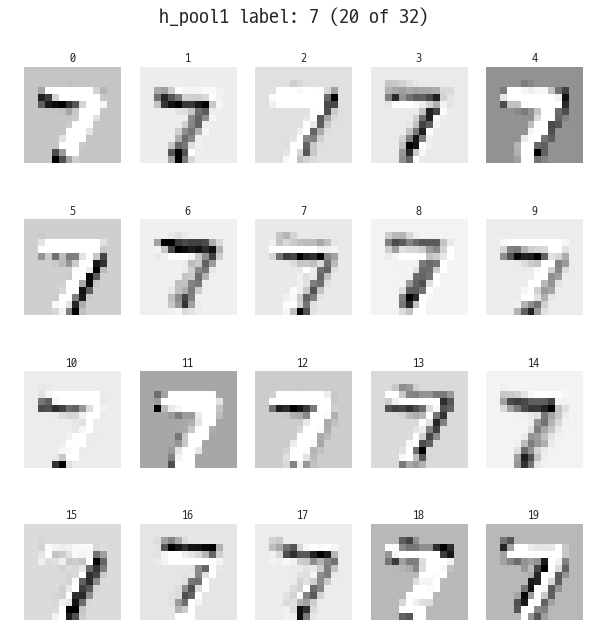

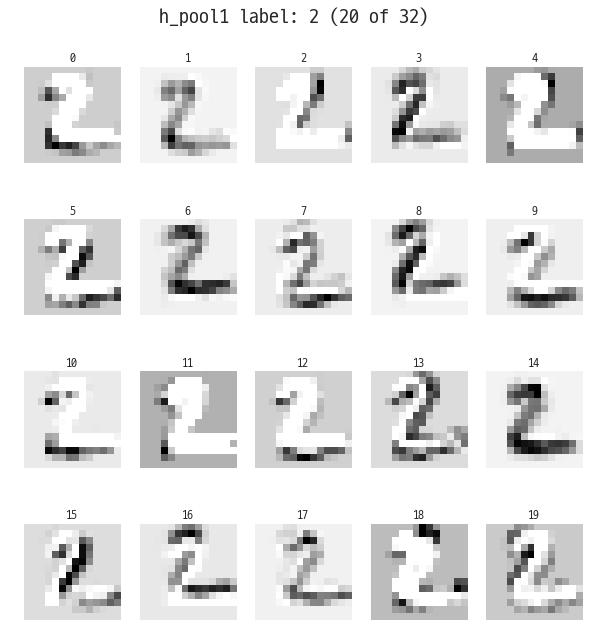

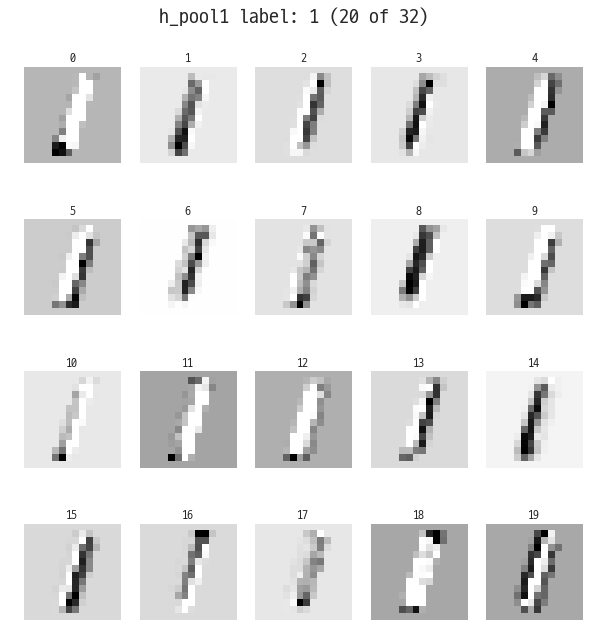

In [45]:
print('load models...')
_h_pool1 = np.load('MNIST_model/h_pool1.npy') # kernels of pooling layer #1 (5x5)
print('load models OK.')

print('_h_pool1:', _h_pool1.shape)
for i, images in enumerate(_h_pool1[:3]):
    show_images(images, is_pooled_image=True, title='h_pool1 label: {label}'.format(label=np.argmax(labels[i])), relative_color=True)

load models...
load models OK.
_W_conv2: (5, 5, 32, 64)
images(is_kernel): (5, 5, 32, 64)
images: (2048, 5, 5)


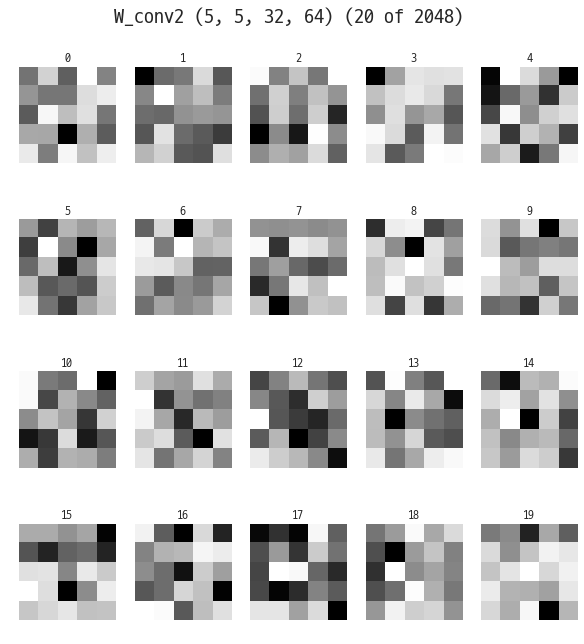

In [46]:
print('load models...')
_W_conv2 = np.load('MNIST_model/W_conv2.npy') # kernels of convolution layer #2 (5x5)
print('load models OK.')

print('_W_conv2:', _W_conv2.shape)
show_images(_W_conv2, is_kernel=True, title='W_conv2 %s' % str(_W_conv2.shape)) # FIXME: hang 걸리는데 이유를 모르겠음.

load models...
load models OK.
_h_pool2: (10000, 7, 7, 64)
images(is_pooled_image): (7, 7, 64)
images: (64, 7, 7)
images(is_pooled_image): (7, 7, 64)
images: (64, 7, 7)
images(is_pooled_image): (7, 7, 64)
images: (64, 7, 7)


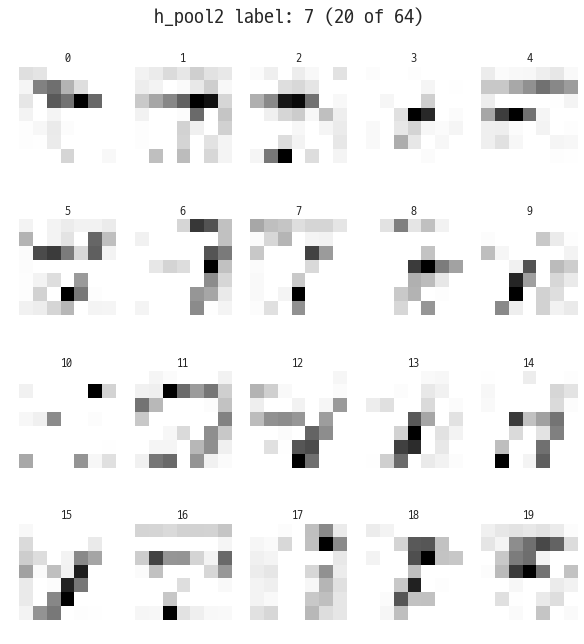

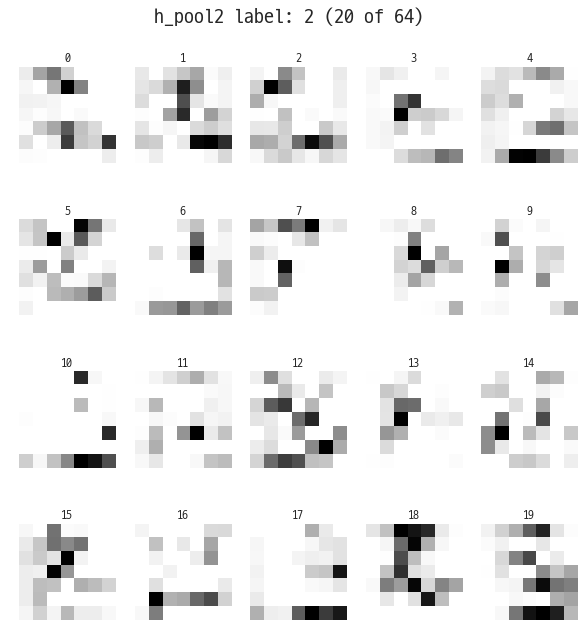

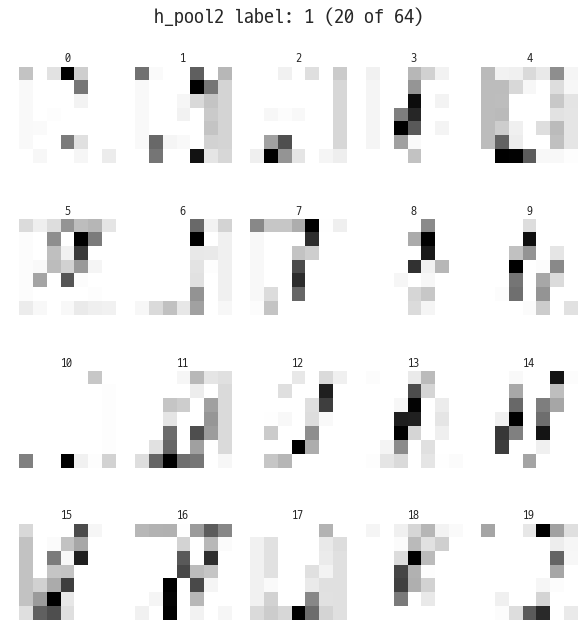

In [47]:
print('load models...')
_h_pool2 = np.load('MNIST_model/h_pool2.npy')
print('load models OK.')

print('_h_pool2:', _h_pool2.shape)
for i, images in enumerate(_h_pool2[:3]):
    show_images(images, is_pooled_image=True, title='h_pool2 label: {label}'.format(label=np.argmax(labels[i])))